# Data PreProcessing

## Import Data

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime

In [8]:
df = pd.read_csv("../data/data_imputed_3.csv")

## Exploratory Data Analysis

In [9]:
df.head()

,timestamp_local,temp,aqi,co,no2,o3,pm10,pm25,so2
0,01/02/2022 0:00,12.6,385,1339.8,76.0,10.7,491.7,347.67,238.0
1,01/02/2022 1:00,11.5,404,1437.6,76.0,9.3,508.3,359.33,268.0
2,01/02/2022 2:00,11.9,421,1535.5,76.0,8.0,525.0,371.00,298.0
3,01/02/2022 3:00,12.2,425,1659.0,68.3,5.3,529.3,374.00,275.7
4,01/02/2022 4:00,11.9,430,1782.5,60.7,2.7,533.7,377.00,253.3


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20978 entries, 0 to 20977
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   timestamp_local  20978 non-null  object 
 1   temp             20978 non-null  float64
 2   aqi              20978 non-null  int64  
 3   co               20978 non-null  float64
 4   no2              20978 non-null  float64
 5   o3               20978 non-null  float64
 6   pm10             20978 non-null  float64
 7   pm25             20978 non-null  float64
 8   so2              20978 non-null  float64
dtypes: float64(7), int64(1), object(1)
memory usage: 1.4+ MB


In [11]:
df['timestamp_local'] = pd.to_datetime(df['timestamp_local'])

ValueError: time data "13/02/2022 0:00" doesn't match format "%m/%d/%Y %H:%M", at position 288. You might want to try:
    - passing `format` if your strings have a consistent format;
    - passing `format='ISO8601'` if your strings are all ISO8601 but not necessarily in exactly the same format;
    - passing `format='mixed'`, and the format will be inferred for each element individually. You might want to use `dayfirst` alongside this.

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20978 entries, 0 to 20977
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   timestamp_local  20978 non-null  object 
 1   temp             20978 non-null  float64
 2   aqi              20978 non-null  int64  
 3   co               20978 non-null  float64
 4   no2              20978 non-null  float64
 5   o3               20978 non-null  float64
 6   pm10             20978 non-null  float64
 7   pm25             20978 non-null  float64
 8   so2              20978 non-null  float64
dtypes: float64(7), int64(1), object(1)
memory usage: 1.4+ MB


In [13]:
df.describe()

,temp,aqi,co,no2,o3,pm10,pm25,so2
count,20978.000000,20978.000000,20978.000000,20978.000000,20978.000000,20978.000000,20978.000000,20978.000000
mean,24.575999,151.079274,335.933278,24.324926,79.709577,112.212980,75.691737,41.309029
std,8.908945,60.974387,341.475022,20.823047,54.543364,86.098594,63.472339,46.450145
min,3.000000,33.000000,46.700000,0.000000,0.000000,7.000000,5.000000,0.000000
25%,17.800000,102.000000,127.800000,7.300000,33.700000,56.300000,35.000000,16.000000
50%,25.600000,150.000000,226.700000,18.000000,72.000000,84.300000,54.000000,25.300000
75%,31.100000,186.000000,410.300000,36.300000,123.000000,137.000000,92.670000,45.000000
max,46.300000,500.000000,5496.000000,129.000000,313.000000,694.500000,595.560000,390.000000


In [14]:
df_indexed = df.copy()

In [15]:
df_indexed.set_index('timestamp_local', inplace=True)

In [16]:
df_indexed.head()

,temp,aqi,co,no2,o3,pm10,pm25,so2
timestamp_local,,,,,,,,
01/02/2022 0:00,12.6,385,1339.8,76.0,10.7,491.7,347.67,238.0
01/02/2022 1:00,11.5,404,1437.6,76.0,9.3,508.3,359.33,268.0
01/02/2022 2:00,11.9,421,1535.5,76.0,8.0,525.0,371.00,298.0
01/02/2022 3:00,12.2,425,1659.0,68.3,5.3,529.3,374.00,275.7
01/02/2022 4:00,11.9,430,1782.5,60.7,2.7,533.7,377.00,253.3


In [17]:
df_indexed.loc['2022-08-04']

KeyError: '2022-08-04'

In [18]:
temp = df_indexed['temp']

In [13]:
temp.head()

timestamp_local
2022-02-01 00:00:00    12.6
2022-02-01 01:00:00    11.5
2022-02-01 02:00:00    11.9
2022-02-01 03:00:00    12.2
2022-02-01 04:00:00    11.9
Name: temp, dtype: float64

<Axes: xlabel='timestamp_local'>

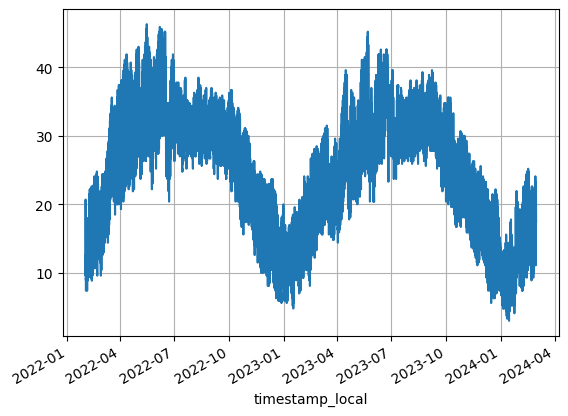

In [14]:
temp.plot(grid=True)

In [17]:
year_one = df_indexed.loc['2022-02-01':'2023-01-31']

In [18]:
year_one

,temp,city_name,country_code,aqi,co,no2,o3,pm10,pm25,so2
timestamp_local,,,,,,,,,,
2022-02-01 00:00:00,12.6,Gujrāt,PK,385.0,1339.8,76.0,10.7,491.7,347.67,238.0
2022-02-01 01:00:00,11.5,Gujrāt,PK,404.0,1437.6,76.0,9.3,508.3,359.33,268.0
2022-02-01 02:00:00,11.9,Gujrāt,PK,421.0,1535.5,76.0,8.0,525.0,371.00,298.0
2022-02-01 03:00:00,12.2,Gujrāt,PK,425.0,1659.0,68.3,5.3,529.3,374.00,275.7
2022-02-01 04:00:00,11.9,Gujrāt,PK,430.0,1782.5,60.7,2.7,533.7,377.00,253.3
...,...,...,...,...,...,...,...,...,...,...
2023-01-31 19:00:00,15.2,Gujrāt,PK,106.0,243.4,24.0,53.3,55.7,37.67,13.3
2023-01-31 20:00:00,14.4,Gujrāt,PK,115.0,286.5,29.0,44.0,61.0,41.00,15.0
2023-01-31 21:00:00,14.1,Gujrāt,PK,117.0,286.2,25.0,47.0,61.7,41.67,18.3


In [19]:
year_two = df_indexed.loc['2023-02-01':'2024-01-31']

In [20]:
year_two

,temp,city_name,country_code,aqi,co,no2,o3,pm10,pm25,so2
timestamp_local,,,,,,,,,,
2023-02-01 00:00:00,12.2,Gujrāt,PK,124.0,281.7,14.7,50.7,65.0,44.33,24.0
2023-02-01 01:00:00,10.7,Gujrāt,PK,128.0,278.0,12.3,48.3,67.0,45.67,23.0
2023-02-01 02:00:00,10.7,Gujrāt,PK,131.0,274.3,10.0,46.0,69.0,47.00,22.0
2023-02-01 03:00:00,10.4,Gujrāt,PK,143.0,286.9,10.7,39.7,74.7,51.33,19.3
2023-02-01 04:00:00,10.4,Gujrāt,PK,150.0,299.6,11.3,33.3,80.3,55.67,16.7
...,...,...,...,...,...,...,...,...,...,...
2024-01-31 19:00:00,15.2,Gujrāt,PK,163.0,181.5,13.7,61.3,117.3,65.33,26.0
2024-01-31 20:00:00,14.8,Gujrāt,PK,156.0,207.8,16.0,56.0,106.0,60.00,26.0
2024-01-31 21:00:00,14.4,Gujrāt,PK,153.0,193.8,13.3,60.3,100.3,57.33,25.7


In [21]:
temp_1 = year_one['temp']

<Axes: xlabel='timestamp_local'>

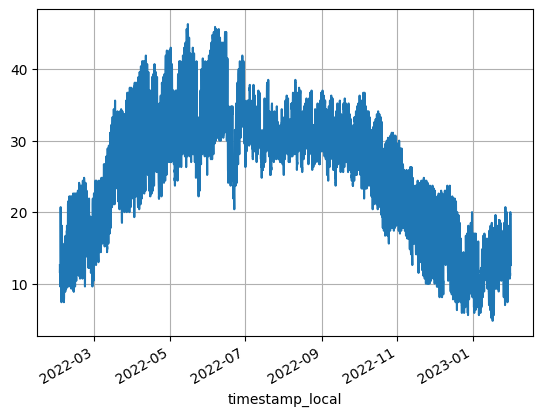

In [39]:
temp_1.plot(grid=True)

In [24]:
temp_2 = year_two['temp']

<Axes: xlabel='timestamp_local'>

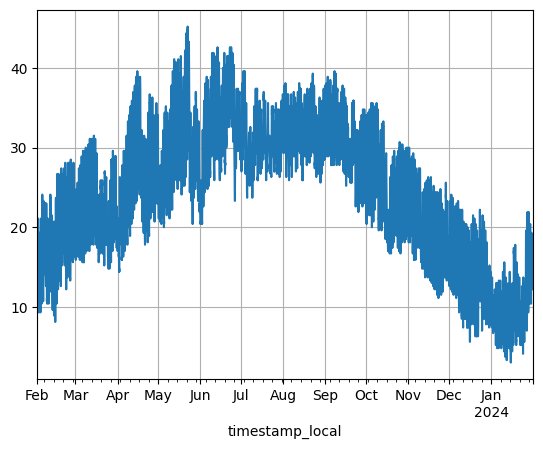

In [25]:
temp_2.plot(grid=True)

In [19]:
import plotly.io as pio
import plotly.express as px
pio.renderers.default = 'iframe'

In [20]:
# Extract year from timestamp_local
df['year'] = df['timestamp_local'].dt.year

# Plot the graph
fig = px.line(df, x='timestamp_local', y='temp', color='year', title='Temperature Over Two Years')

# Enable range slider for x-axis
fig.update_xaxes(rangeslider_visible=True)

# Show the plot
fig.show()

AttributeError: Can only use .dt accessor with datetimelike values

In [79]:
fig = px.line(df,x='timestamp_local',y='pm25',title='PM 2.5')

fig.update_xaxes(rangeslider_visible=True)
fig.show()

In [48]:
fig = px.line(df,x='timestamp_local',y='pm10',title='PM 10')

fig.update_xaxes(rangeslider_visible=True)
fig.show()

In [49]:
fig = px.line(df,x='timestamp_local',y='aqi',title='AQI')

fig.update_xaxes(rangeslider_visible=True)
fig.show()

In [50]:
fig = px.line(df,x='timestamp_local',y='co',title='CO')

fig.update_xaxes(rangeslider_visible=True)
fig.show()

In [51]:
fig = px.line(df,x='timestamp_local',y='no2',title='NO2')

fig.update_xaxes(rangeslider_visible=True)
fig.show()

In [52]:
fig = px.line(df,x='timestamp_local',y='so2',title='SO2')

fig.update_xaxes(rangeslider_visible=True)
fig.show()

In [53]:
fig = px.line(df,x='timestamp_local',y='o3',title='O3')

fig.update_xaxes(rangeslider_visible=True)
fig.show()

array([[<Axes: title={'center': 'pm25'}>,
        <Axes: title={'center': 'temp'}>]], dtype=object)

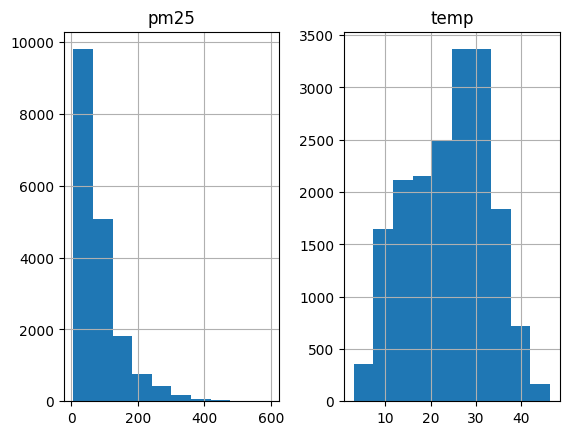

In [86]:
df[['pm25','temp']].hist()

<Axes: ylabel='Density'>

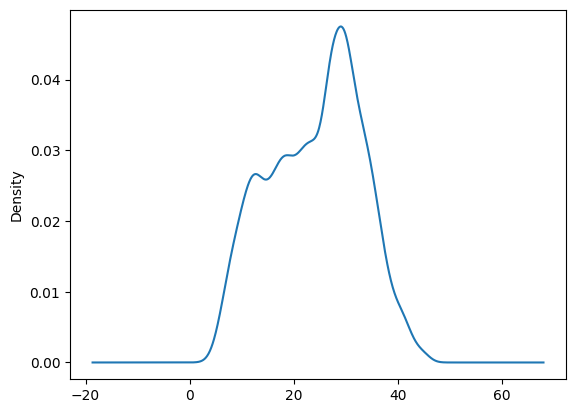

In [87]:
df['temp'].plot(kind='density')

<Axes: xlabel='y(t)', ylabel='y(t + 1)'>

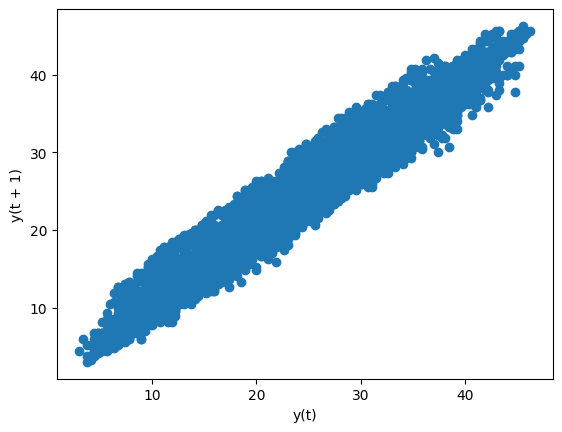

In [88]:
pd.plotting.lag_plot(df['temp'],lag=1)

<Axes: xlabel='y(t)', ylabel='y(t + 10)'>

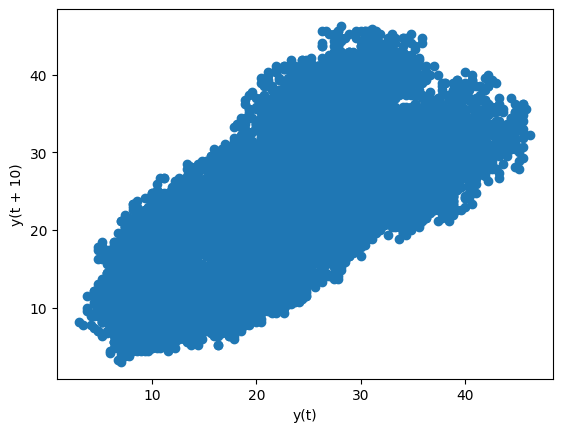

In [89]:
pd.plotting.lag_plot(df['temp'],lag=10)

<Axes: xlabel='y(t)', ylabel='y(t + 24)'>

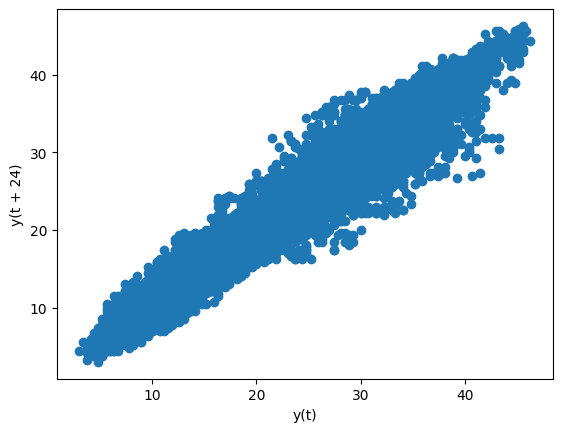

In [90]:
pd.plotting.lag_plot(df['temp'],lag=24)

<Axes: xlabel='y(t)', ylabel='y(t + 8640)'>

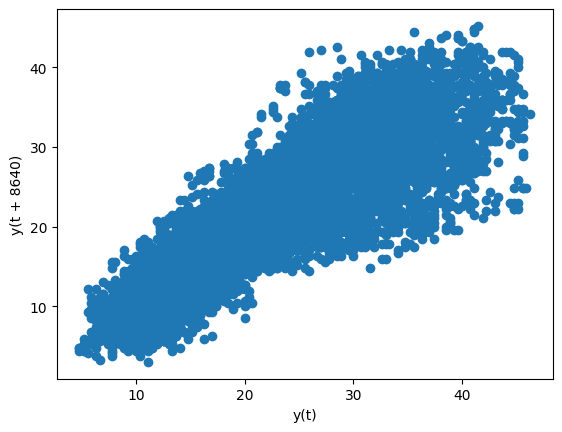

In [91]:
pd.plotting.lag_plot(df['temp'],lag=8640)

<Axes: xlabel='y(t)', ylabel='y(t + 4320)'>

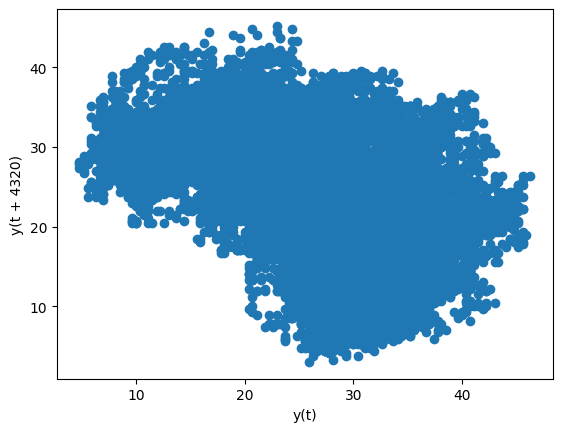

In [92]:
pd.plotting.lag_plot(df['temp'],lag=4320)

<Axes: xlabel='y(t)', ylabel='y(t + 2150)'>

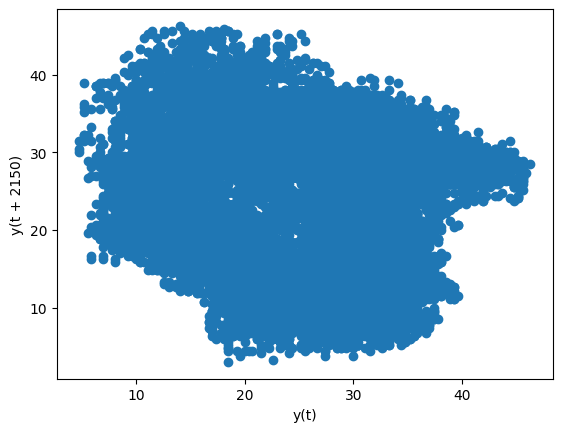

In [93]:
pd.plotting.lag_plot(df['temp'],lag=2150)

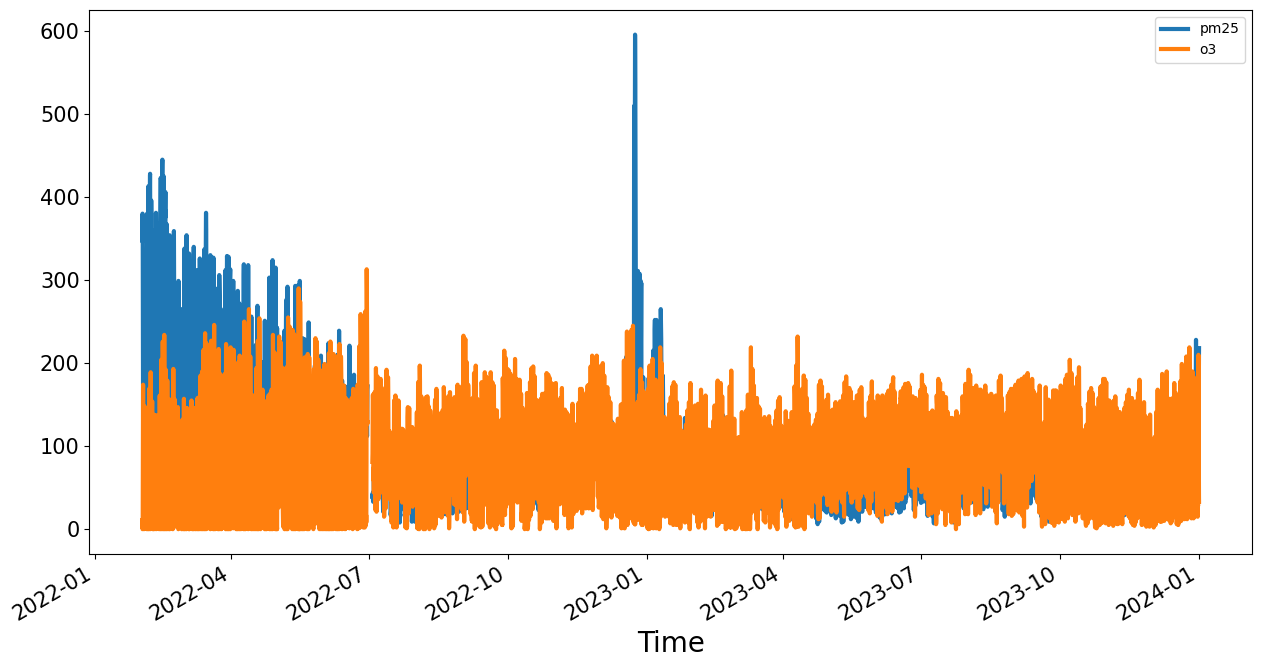

In [95]:
df_indexed['2022':'2023'][['pm25','o3']].plot(figsize=(15,8), linewidth=3, fontsize=15)
plt.xlabel('Time', fontsize=20);

In [96]:
df.isnull().sum()

temp                0
timestamp_local     0
city_name           0
country_code        0
aqi                74
co                 74
no2                74
o3                 74
pm10               74
pm25               74
so2                74
year                0
dtype: int64

In [100]:
import seaborn as sns

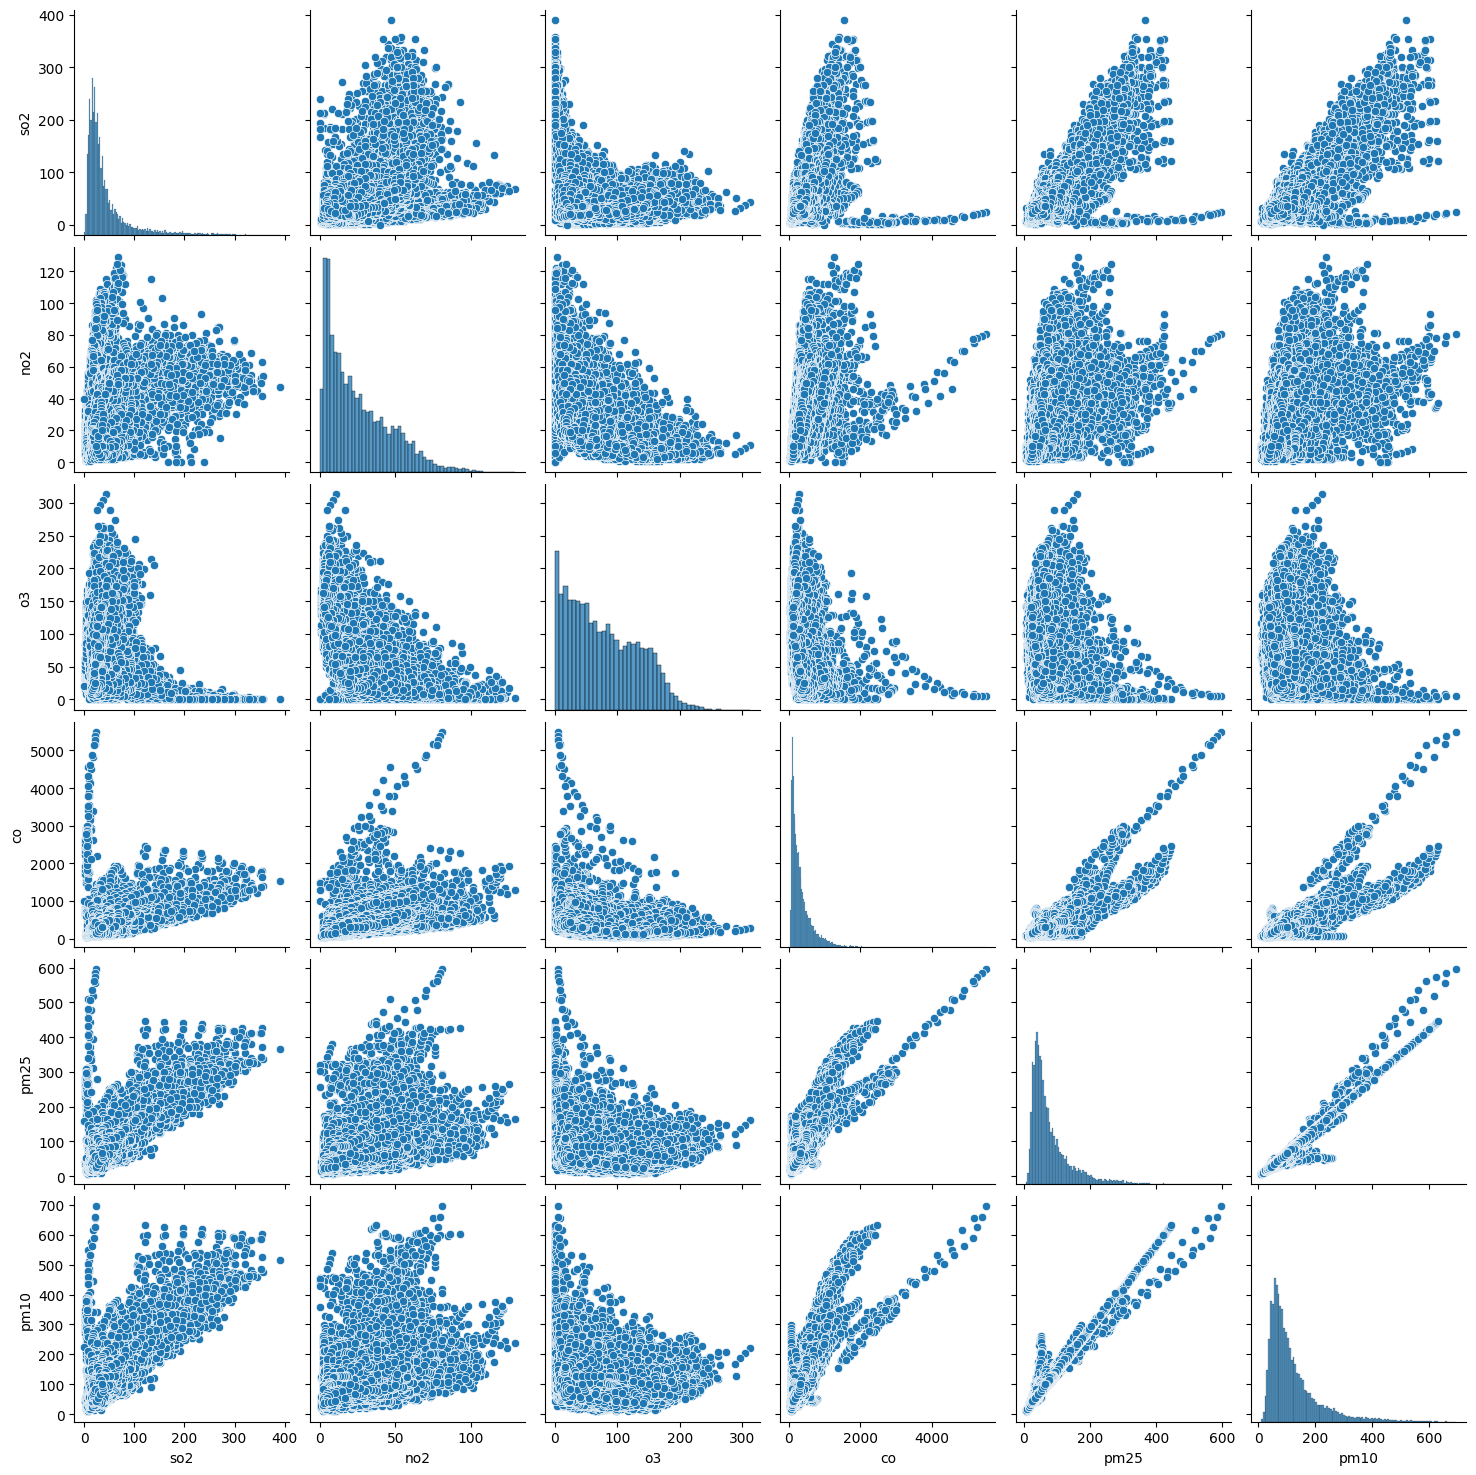

In [101]:
g = sns.pairplot(df[['so2','no2','o3', 'co','pm25', 'pm10']])

In [106]:
aq_corr=df[['temp','so2','no2','o3', 'co','pm25', 'pm10']].corr(method='pearson')
aq_corr

,temp,so2,no2,o3,co,pm25,pm10
temp,1.000000,-0.154574,-0.308132,0.544079,-0.535017,-0.337149,-0.328371
so2,-0.154574,1.000000,0.436848,-0.313406,0.518056,0.803575,0.811833
no2,-0.308132,0.436848,1.000000,-0.697737,0.547017,0.512756,0.504731
o3,0.544079,-0.313406,-0.697737,1.000000,-0.434316,-0.379563,-0.369729
co,-0.535017,0.518056,0.547017,-0.434316,1.000000,0.843471,0.813973
pm25,-0.337149,0.803575,0.512756,-0.379563,0.843471,1.000000,0.991385
pm10,-0.328371,0.811833,0.504731,-0.369729,0.813973,0.991385,1.000000


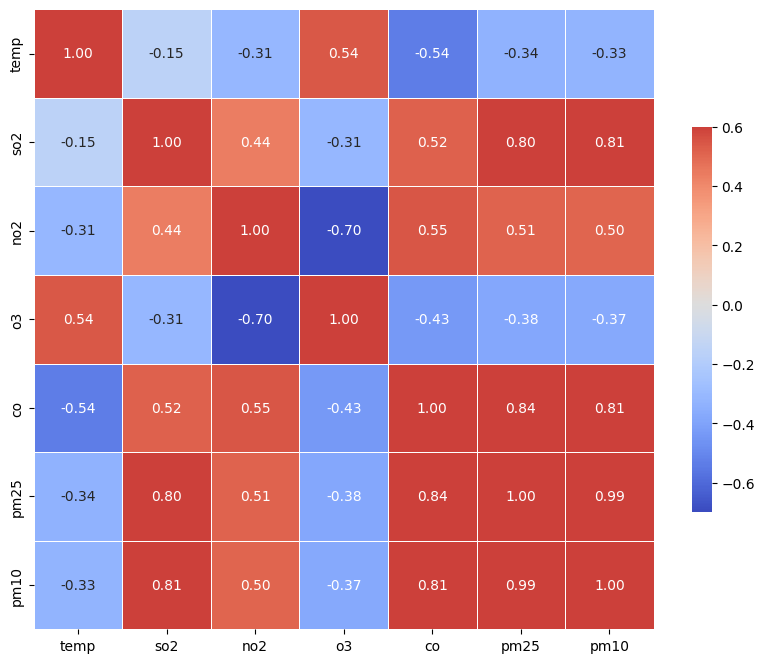

In [107]:
g = sns.heatmap(aq_corr,  vmax=.6, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True, fmt='.2f', cmap='coolwarm')
g.figure.set_size_inches(10,10)
    
plt.show()

In [108]:
df_na = df.copy()
df_na=df_na.dropna()

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

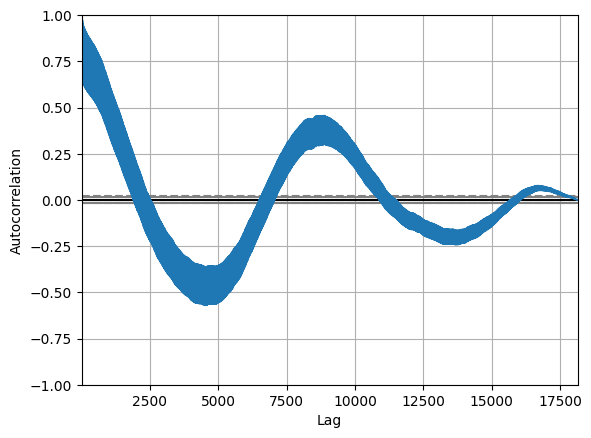

In [110]:
pd.plotting.autocorrelation_plot(df_na['temp'])

In [113]:
df_indexed['temp'].resample("1m").mean()

C:\Users\Hassan\AppData\Local\Temp\ipykernel_2996\3868638566.py:1: FutureWarning:

'm' is deprecated and will be removed in a future version, please use 'ME' instead.



timestamp_local
2022-02-28    15.324851
2022-03-31    24.060618
2022-04-30    31.071111
2022-05-31    33.437500
2022-06-30    34.065972
2022-07-31    30.532124
2022-08-31    30.934140
2022-09-30    29.756667
2022-10-31    25.520403
2022-11-30    18.447222
2022-12-31    13.325638
2023-01-31    11.873387
2023-02-28    17.557738
2023-03-31    21.602554
2023-04-30    26.155972
2023-05-31    29.752823
2023-06-30    32.696528
2023-07-31    30.673925
2023-08-31    31.897984
2023-09-30    30.648333
2023-10-31    24.374194
2023-11-30    18.947778
2023-12-31    13.644624
2024-01-31     9.547581
2024-02-29    15.136351
Freq: ME, Name: temp, dtype: float64

C:\Users\Hassan\AppData\Local\Temp\ipykernel_2996\2861913747.py:1: FutureWarning:

'm' is deprecated and will be removed in a future version, please use 'ME' instead.



<Axes: xlabel='Lag', ylabel='Autocorrelation'>

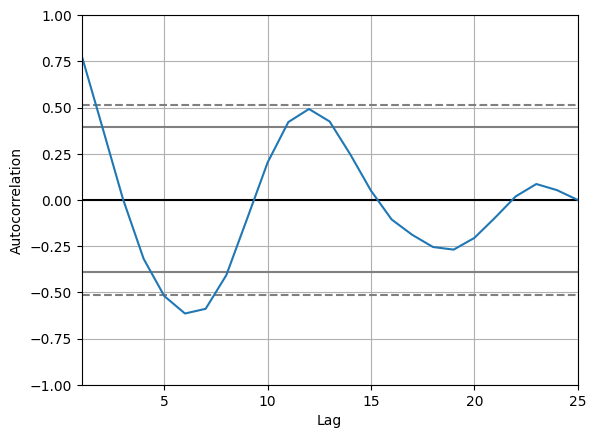

In [114]:
pd.plotting.autocorrelation_plot(df_indexed['temp'].resample("1m").mean())

C:\Users\Hassan\AppData\Local\Temp\ipykernel_2996\1221933488.py:1: FutureWarning:

'm' is deprecated and will be removed in a future version, please use 'ME' instead.



<Axes: xlabel='Lag', ylabel='Autocorrelation'>

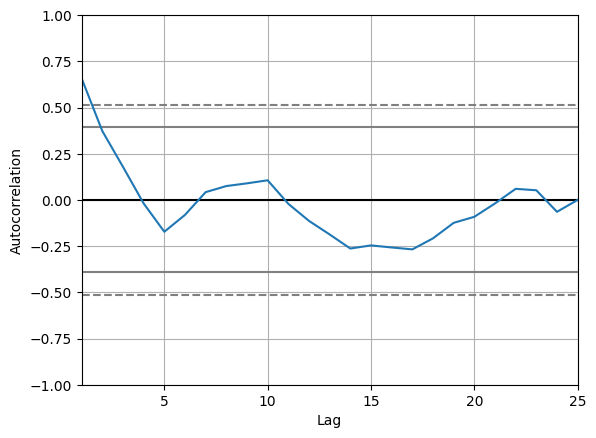

In [115]:
pd.plotting.autocorrelation_plot(df_indexed['pm25'].resample("1m").mean())